<a href="https://colab.research.google.com/github/Tekleab15/Quantum_Computing_Tasks/blob/main/Task4_Quantum_Coin_Flip_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 4: Quantum Coin Flip Game**

Simulate a game where:

- Alice prepares a qubit in |+⟩ and sends it to Bob.

- Bob randomly chooses to measure it in the X-basis (|+⟩/|-⟩) or Z-basis (|0⟩/|1⟩).

- If Bob measures |+⟩ or |0⟩, he wins; else, Alice wins.

- Run 500 trials and calculate the win rates.

Twist: Let Bob entangle his measurement choice with another qubit. Does this change the odds?

In [43]:
# Installing the required modules in the
# !pip install qiskit qiskit_aer

In [32]:
# Installing required libraries
import qiskit
from qiskit import QuantumCircuit
from qiskit_aer.primitives import SamplerV2
from qiskit.visualization import plot_histogram
import random

# **Part 1. Non Entangled Implementation**

In [33]:
# Function to simulate the quantum coin flip game using SamplerV2
def quantum_coin_flip_game(shots=500):
    # Base quantum circuit preparation: Alice prepares qubit in |+> state
    qc_base = QuantumCircuit(1, 1)
    qc_base.h(0)

    # Create circuits for Bob's random basis choice
    circuits = []
    for _ in range(shots):
        qc = qc_base.copy()
        # Bob randomly chooses X or Z basis
        bob_choice = "X" if random.random() < 0.5 else "Z"
        if bob_choice == "X":
            qc.h(0)  # Rotate to X-basis for measurement
        # Measure in the chosen basis
        qc.measure(0, 0)
        circuits.append(qc)

    # Run all circuits together using SamplerV2
    sampler = SamplerV2()
    job = sampler.run(circuits, shots=1)
    result = job.result()

    # Process the results to count wins for Bob and Alice
    counts = {"Bob": 0, "Alice": 0}
    for res in result:
        # Extract the measurement outcomes from the results directly
        meas_counts = res.data.c.get_counts()
        for outcome, count in meas_counts.items():
            if outcome == "0":  # Bob wins
                counts["Bob"] += count
            else:  # Alice wins otherwise
                counts["Alice"] += count
    return counts

Quantum Coin Flip Game Results:
Bob Wins: 374, Alice Wins: 126
Bob Win Rate: 74.8%, Alice Win Rate: 25.2%


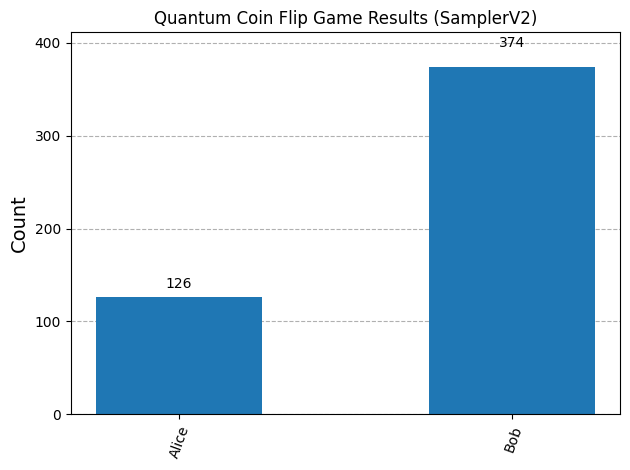

In [34]:
# Simulate the quantum coin flip game
counts = quantum_coin_flip_game(shots=500)

# Display the results
print("Quantum Coin Flip Game Results:")
print(f"Bob Wins: {counts['Bob']}, Alice Wins: {counts['Alice']}")

# Calculate and print win rates
bob_win_rate = counts["Bob"] / 500 * 100
alice_win_rate = counts["Alice"] / 500 * 100
print(f"Bob Win Rate: {bob_win_rate:.1f}%, Alice Win Rate: {alice_win_rate:.1f}%")

# Visualize the results using a histogram
plot_histogram(counts, title="Quantum Coin Flip Game Results (SamplerV2)")

# **2. Entangled implementation**

In [50]:
def quantum_coin_flip_game_entangled(shots=500):
    # Create a single circuit for the entangled scenario
    # 2 qubits, 2 classical bits
    qc = QuantumCircuit(2, 2)
    # Alice prepares the first qubit (index 0) in |+>
    qc.h(0)

    # Bob entangles his measurement choice (implicitly on qubit 1) with the data qubit (qubit 0)
    qc.h(1)
    qc.cx(1, 0)

    # Measurement: We measure both qubits
    qc.measure([0, 1], [0, 1])

    # Run the single circuit with multiple shots using SamplerV2
    sampler = SamplerV2()
    job = sampler.run([qc], shots=shots)
    result = job.result()
    # Get counts for all shots at once
    counts = result[0].data.c.get_counts()

    # Process the results to count wins for Bob and Alice
    bob_wins = 0
    alice_wins = 0
    for outcome, count in counts.items():
        # Outcome is read from right to left: classical bit 1 (control), classical bit 0 (data)
        data_outcome = outcome[1]
        control_outcome = outcome[0]
        # If control qubit was |0> (Z-basis choice), Bob wins if data qubit was |0>
        if control_outcome == '0' and data_outcome == '0':
            bob_wins += count
        # If control qubit was |1> (X-basis choice), Bob wins if data qubit was |+> (which would likely result in '0' after the entanglement)
        elif control_outcome == '1' and data_outcome == '0':
            bob_wins += count
        else:
            alice_wins += count
    return {"Bob": bob_wins, "Alice": alice_wins}


Quantum Coin Flip Game Results (Entangled -ernative):
Bob Wins: 264, Alice Wins: 236
Bob Win Rate: 52.8%, Alice Win Rate: 47.2%


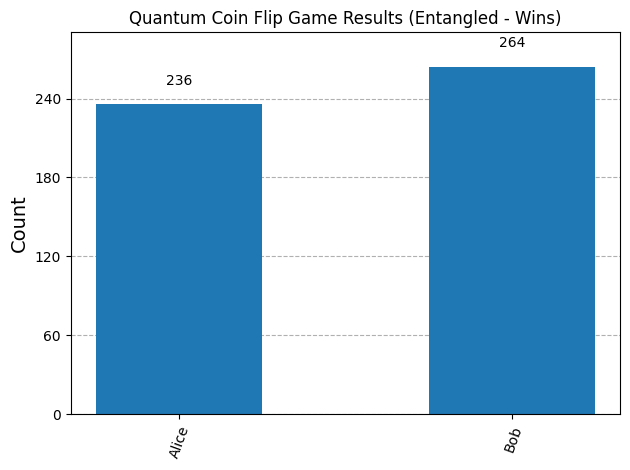

In [51]:
# Simulate the entangled quantum coin flip game
counts_entangled = quantum_coin_flip_game_entangled(shots=500)

# Display the results for the entangled scenario
print("\nQuantum Coin Flip Game Results (Entangled -ernative):")
print(f"Bob Wins: {counts_entangled['Bob']}, Alice Wins: {counts_entangled['Alice']}")

bob_win_rate_entangled = counts_entangled["Bob"] / 500 * 100
alice_win_rate_entangled = counts_entangled["Alice"] / 500 * 100
print(f"Bob Win Rate: {bob_win_rate_entangled:.1f}%, Alice Win Rate: {alice_win_rate_entangled:.1f}%")

# Visualize the results (Bob's wins vs. Alice's wins) using a histogram
win_counts = {"Bob": counts_entangled["Bob"], "Alice": counts_entangled["Alice"]}
plot_histogram(win_counts, title="Quantum Coin Flip Game Results (Entangled - Wins)")